In [0]:
#unzipping the files for data 
import zipfile
with zipfile.ZipFile('bbc-news-summary.zip', 'r') as zip_ref:
    zip_ref.extractall('')

In [5]:
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt') # one time execution
import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [0]:
import os
business_texts=os.listdir('bbc news summary/BBC News Summary/News Articles/business')

In [0]:
#Tokenization 
from nltk.tokenize import sent_tokenize
sentences = []
root='bbc news summary/BBC News Summary/News Articles/business'
for s in business_texts:
  file_ = open(root+'/'+s, "r") 
  business_file=file_.read().replace('\n', '.')
  business_file=business_file.split('.')
  for sent in business_file:
    if sent!='':
      if sent[0].isdigit():
        sentences[-1][0]+=sent_tokenize(sent)[0]
      else:
        sentences.append(sent_tokenize(sent))


In [8]:
sentences[0:10]

[['Boeing unveils new 777 aircraft'],
 ["US aircraft firm Boeing has unveiled its new long-distance 777 plane, as it tries to regain its position as the industry's leading manufacturer"],
 ['The 777-200LR will be capable of flying almost 11,000 miles non-stop, linking cities such as London and Sydney'],
 [' Boeing, in contrast to European rival Airbus, hopes airlines will want to fly smaller aircraft over longer distances'],
 [' Airbus, which overtook Boeing as the number one civilian planemaker in 2003, is focusing on so-called super jumbos'],
 ['Analysts are divided over which approach is best and say that this latest tussle between Boeing and Airbus may prove to be a defining moment for the airline industry'],
 [" Boeing plans to offer twin-engine planes that are able to fly direct to many of the world's airports, getting rid of the need for connecting flights"],
 ['It is banking on smaller, slimmer planes such as the 777-200LR and its much-anticipated 787 Dreamliner plane, which is

In [9]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove*.zip

--2020-02-04 07:21:42--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2020-02-04 07:21:42--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2020-02-04 07:21:43--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [0]:
import re
clean_sentences = []
ind=0
while ind < len(sentences):
  i=sentences[ind]
  regex = re.compile('[^a-zA-Z]')
  if len(i)!=0:
    clean_sentences.append(regex.sub(' ', i[0]))
    ind+=1
  else:
    del sentences[ind]

clean_sentences = [s.lower() for s in clean_sentences]

In [0]:
stop_words= ['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'between',
 'into',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'other',
 'some',
 'such',
 'only',
 'own',
 'so',
 'than',
 'too',
 'very',
 's',
 't',
 'can',
 'will',
 'just',
 'now',
 'm',
 'd',
 'll',
 'could',
 'would',
 'more',
 'also',
 'said',
 'mr',
 'however',
 'may']

In [0]:
# function to remove stopwords
def remove_stopwords(sen):
    sen_new = " ".join([i for i in sen if i not in stop_words])
    return sen_new

In [0]:
# remove stopwords from the sentences
clean_sentences = [remove_stopwords(r.split()) for r in clean_sentences]

In [0]:
# Extract word vectors
import numpy as np
word_embeddings = {}
f = open('glove.6B.100d.txt', encoding='utf-8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    word_embeddings[word] = coefs
f.close()

In [0]:
business_words={}
for i in clean_sentences:
  if len(i)!=0:
    for w in i.split():
      if w not in business_words:
        business_words[w]=1
      else:
        business_words[w]+=1
        
bs_words=pd.DataFrame.from_dict({'words':list(business_words.keys()),'counts':list(business_words.values()) })
bs_words=bs_words.set_index('words')

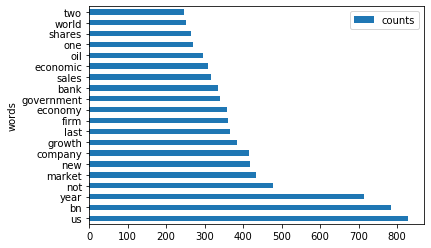

In [16]:
top_twenty=bs_words.nlargest(20, ['counts'])
ax = top_twenty.plot.barh(x=None, y='counts', rot=0)

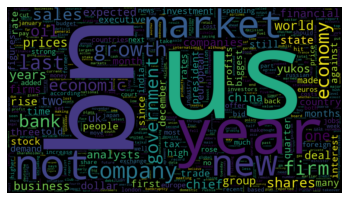

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(business_words)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [0]:
sentence_vectors = []
for i in clean_sentences:
  if len(i) != 0:
    v = sum([word_embeddings.get(w, np.zeros((100,))) for w in i.split()])/(len(i.split())+0.001)
  else:
    v = np.zeros((100,))
  sentence_vectors.append(np.array(v))

sentence_vectors=np.array(sentence_vectors)

In [19]:
def cosine_similarities(mat):
  norm = (mat.T * mat.T).sum(0, keepdims=True) ** .5
  return (mat @ mat.T ) / norm.T / norm 

sim_mat=cosine_similarities(sentence_vectors)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
new_sim_mat = np.where(np.isnan(sim_mat), 0, sim_mat)
new_sim_mat = new_sim_mat/5

from scipy import sparse
new_sim_mat[new_sim_mat < 0.19]=0
for i in range(len(sentences)):
  new_sim_mat[i,i] = 0
new_sim_mat[np.isnan(new_sim_mat)] =0
sparse_mat = sparse.csr_matrix(new_sim_mat)
sparse_mat.eliminate_zeros()


In [21]:
sparse_array = sparse_mat.toarray()
import networkx as nx
Simarility_SparseGraph = nx.Graph()

for i in range(len(sparse_array)):
    for j in range(len(sparse_array[0])):
        if(sparse_array[i][j] != 0):
            Simarility_SparseGraph.add_edge(sentences[i][0], sentences[j][0])

print(nx.info(Simarility_SparseGraph))

Name: 
Type: Graph
Number of nodes: 1369
Number of edges: 1806
Average degree:   2.6384


In [0]:
nx.write_gml(Simarility_SparseGraph, "SimilaritySparseGraph_tech.gml")